# deep learning starting 

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [4]:
#using keras to import the dataset 

(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


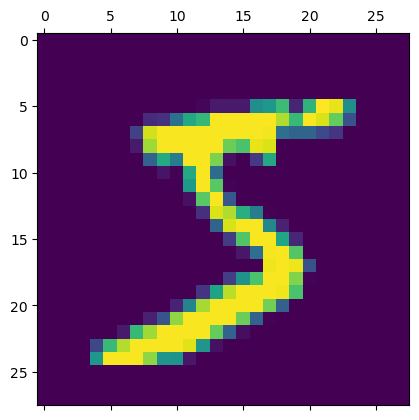

In [8]:
plt.matshow(x_train[0])

In [28]:
#scaling for accuracy

x_train=x_train/255
x_test=x_test/255

In [34]:
# reshaping it intob flatten 

x_train_flatten=x_train.reshape(len(x_train),28*28)
x_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [30]:
x_test_flatten=x_test.reshape(len(x_test),28*28)
x_test_flatten

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']

)

model.fit(x_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 937us/step - loss: 0.4729 - accuracy: 0.8768
Epoch 2/5
1875/1875 [==============================] - 2s 963us/step - loss: 0.3041 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2830 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2734 - accuracy: 0.9227
Epoch 5/5
1875/1875 [==============================] - 2s 974us/step - loss: 0.2667 - accuracy: 0.9256


In [35]:
#evaluate the model peformance

model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 0s 809us/step - loss: 0.2669 - accuracy: 0.9268


[0.266912579536438, 0.926800012588501]

In [37]:
# predicton score of the testing value 

y_predicted=model.predict(x_test_flatten)
y_predicted[0]

313/313 [==============================] - 0s 718us/step


array([3.1849679e-02, 3.2132596e-07, 7.5456642e-02, 9.5792437e-01,
       2.5048389e-03, 1.2508254e-01, 1.6805726e-06, 9.9977118e-01,
       8.9705043e-02, 7.0423186e-01], dtype=float32)

In [38]:
#predicting the maximum value from the array


np.argmax(y_predicted[0])

7

In [43]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [45]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [46]:
# building a confusion matrix

cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    2,    2,    0,    4,    6,    2,    1,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   4,    7,  945,   12,    9,    4,   11,    9,   27,    4],
       [   4,    0,   25,  908,    0,   31,    2,   10,   22,    8],
       [   1,    1,    5,    2,  914,    0,   10,    4,   10,   35],
       [  11,    2,    6,   25,   10,  788,   12,    6,   26,    6],
       [  12,    3,    7,    1,    7,   12,  913,    2,    1,    0],
       [   1,    5,   26,    5,    8,    0,    0,  946,    2,   35],
       [  10,    7,    8,   20,    9,   30,    9,   11,  860,   10],
       [  11,    6,    1,   10,   30,    8,    0,   19,    4,  920]])>

Text(220.72222222222223, 0.5, 'Truth')

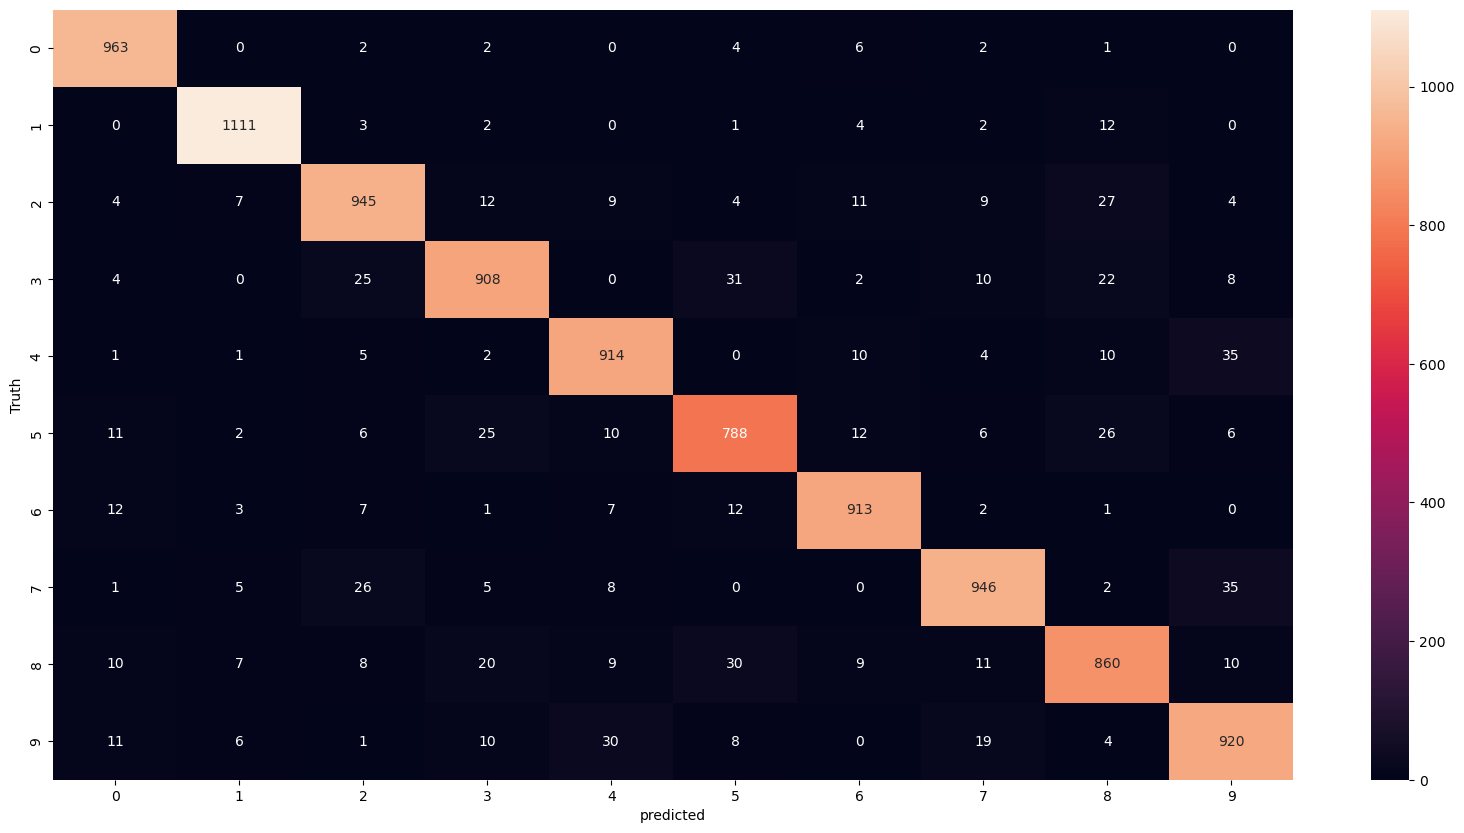

In [49]:
import seaborn as sns 
plt.figure(figsize =(20,10))
sns.heatmap(cm ,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [53]:
#adding the hiddenlayer


model=keras.Sequential([
     keras.layers.Dense(100,input_shape=(784,),activation='relu'),
     keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']

)

model.fit(x_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2749 - accuracy: 0.9227
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1253 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0865 - accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0660 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0513 - accuracy: 0.9838


In [61]:
#using flatten fucnion from keras

model=keras.Sequential([
     keras.layers.Flatten(input_shape=(28,28)),
     keras.layers.Dense(100, activation='relu'),
     keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adagrad',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']

)

model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 1.1999 - accuracy: 0.7113
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6565 - accuracy: 0.8424
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5368 - accuracy: 0.8640
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4785 - accuracy: 0.8756
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4424 - accuracy: 0.8842


In [ ]:
#creating a mean squre error function 

y=[1,2,3,4,5]

# gradient decent 

In [84]:
import pandas as pd

df=pd.DataFrame({
    "age":[22,35,45,40,65,23,33,46,70,60],
    "affodability":[0,1,1,1,1,0,0,1,0,1],
    "insurance_credited":[0,1,1,1,0,0,0,1,0,1]
})
df

,age,affodability,insurance_credited
0,22,0,0
1,35,1,1
2,45,1,1
3,40,1,1
4,65,1,0
5,23,0,0
6,33,0,0
7,46,1,1
8,70,0,0
9,60,1,1


In [86]:



from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(df[['age','affodability']],df.insurance_credited,test_size=0.2,random_state=0)

In [87]:
len(x_train)

8

In [88]:
y_train

4    0
9    1
1    1
6    0
7    1
3    1
0    0
5    0
Name: insurance_credited, dtype: int64

In [89]:
x_train_scaled=x_train.copy()
x_train_scaled['age']=x_train_scaled['age']/100

In [90]:
x_test_scaled=x_test.copy()
x_test_scaled['age']=x_test_scaled['age']/100

In [14]:
x_train_scaled

,age,affodability
5,0.23,0
0,0.22,0
7,0.46,1
2,0.45,1
3,0.40,1
6,0.33,0
9,0.60,1
8,0.70,0


In [91]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [53]:
#created the model 


model= keras.Sequential([
    keras.layers.Dense(1,input_shape=(2,), activation='sigmoid',kernel_initializer='ones',bias_initializer='zeros')
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [54]:
#model fitting 

model.fit(x_train_scaled,y_train ,epochs=500)

Epoch 1/500
1/1 [==============================] - 1s 536ms/step - loss: 0.6456 - accuracy: 0.5000
Epoch 2/500
1/1 [==============================] - 0s 7ms/step - loss: 0.6453 - accuracy: 0.5000
Epoch 3/500
1/1 [==============================] - 0s 7ms/step - loss: 0.6450 - accuracy: 0.5000
Epoch 4/500
1/1 [==============================] - 0s 6ms/step - loss: 0.6447 - accuracy: 0.5000
Epoch 5/500
1/1 [==============================] - 0s 8ms/step - loss: 0.6444 - accuracy: 0.5000
Epoch 6/500
1/1 [==============================] - 0s 7ms/step - loss: 0.6441 - accuracy: 0.5000
Epoch 7/500
1/1 [==============================] - 0s 9ms/step - loss: 0.6438 - accuracy: 0.5000
Epoch 8/500
1/1 [==============================] - 0s 8ms/step - loss: 0.6435 - accuracy: 0.5000
Epoch 9/500
1/1 [==============================] - 0s 6ms/step - loss: 0.6431 - accuracy: 0.5000
Epoch 10/500
1/1 [==============================] - 0s 10ms/step - loss: 0.6428 - accuracy: 0.5000
Epoch 11/500
1/1 [========

1/1 [==============================] - 0s 10ms/step - loss: 0.6223 - accuracy: 0.5000
Epoch 85/500
1/1 [==============================] - 0s 9ms/step - loss: 0.6220 - accuracy: 0.5000
Epoch 86/500
1/1 [==============================] - 0s 9ms/step - loss: 0.6217 - accuracy: 0.5000
Epoch 87/500
1/1 [==============================] - 0s 10ms/step - loss: 0.6215 - accuracy: 0.5000
Epoch 88/500
1/1 [==============================] - 0s 11ms/step - loss: 0.6212 - accuracy: 0.5000
Epoch 89/500
1/1 [==============================] - 0s 15ms/step - loss: 0.6210 - accuracy: 0.5000
Epoch 90/500
1/1 [==============================] - 0s 10ms/step - loss: 0.6207 - accuracy: 0.5000
Epoch 91/500
1/1 [==============================] - 0s 10ms/step - loss: 0.6204 - accuracy: 0.5000
Epoch 92/500
1/1 [==============================] - 0s 7ms/step - loss: 0.6202 - accuracy: 0.5000
Epoch 93/500
1/1 [==============================] - 0s 8ms/step - loss: 0.6199 - accuracy: 0.5000
Epoch 94/500
1/1 [=========

1/1 [==============================] - 0s 11ms/step - loss: 0.6014 - accuracy: 0.5000
Epoch 167/500
1/1 [==============================] - 0s 8ms/step - loss: 0.6012 - accuracy: 0.5000
Epoch 168/500
1/1 [==============================] - 0s 9ms/step - loss: 0.6009 - accuracy: 0.5000
Epoch 169/500
1/1 [==============================] - 0s 12ms/step - loss: 0.6007 - accuracy: 0.5000
Epoch 170/500
1/1 [==============================] - 0s 11ms/step - loss: 0.6004 - accuracy: 0.5000
Epoch 171/500
1/1 [==============================] - 0s 9ms/step - loss: 0.6002 - accuracy: 0.5000
Epoch 172/500
1/1 [==============================] - 0s 8ms/step - loss: 0.5999 - accuracy: 0.5000
Epoch 173/500
1/1 [==============================] - 0s 9ms/step - loss: 0.5997 - accuracy: 0.5000
Epoch 174/500
1/1 [==============================] - 0s 9ms/step - loss: 0.5994 - accuracy: 0.5000
Epoch 175/500
1/1 [==============================] - 0s 12ms/step - loss: 0.5992 - accuracy: 0.5000
Epoch 176/500
1/1 [=

1/1 [==============================] - 0s 23ms/step - loss: 0.5818 - accuracy: 0.7500
Epoch 249/500
1/1 [==============================] - 0s 16ms/step - loss: 0.5815 - accuracy: 0.7500
Epoch 250/500
1/1 [==============================] - 0s 12ms/step - loss: 0.5813 - accuracy: 0.7500
Epoch 251/500
1/1 [==============================] - 0s 12ms/step - loss: 0.5811 - accuracy: 0.7500
Epoch 252/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5808 - accuracy: 0.7500
Epoch 253/500
1/1 [==============================] - 0s 9ms/step - loss: 0.5806 - accuracy: 0.7500
Epoch 254/500
1/1 [==============================] - 0s 10ms/step - loss: 0.5804 - accuracy: 0.7500
Epoch 255/500
1/1 [==============================] - 0s 11ms/step - loss: 0.5801 - accuracy: 0.7500
Epoch 256/500
1/1 [==============================] - 0s 13ms/step - loss: 0.5799 - accuracy: 0.7500
Epoch 257/500
1/1 [==============================] - 0s 13ms/step - loss: 0.5797 - accuracy: 0.7500
Epoch 258/500
1/

1/1 [==============================] - 0s 11ms/step - loss: 0.5634 - accuracy: 0.8750
Epoch 331/500
1/1 [==============================] - 0s 10ms/step - loss: 0.5632 - accuracy: 0.8750
Epoch 332/500
1/1 [==============================] - 0s 10ms/step - loss: 0.5629 - accuracy: 0.8750
Epoch 333/500
1/1 [==============================] - 0s 14ms/step - loss: 0.5627 - accuracy: 0.8750
Epoch 334/500
1/1 [==============================] - 0s 14ms/step - loss: 0.5625 - accuracy: 0.8750
Epoch 335/500
1/1 [==============================] - 0s 14ms/step - loss: 0.5623 - accuracy: 0.8750
Epoch 336/500
1/1 [==============================] - 0s 14ms/step - loss: 0.5621 - accuracy: 0.8750
Epoch 337/500
1/1 [==============================] - 0s 9ms/step - loss: 0.5619 - accuracy: 0.8750
Epoch 338/500
1/1 [==============================] - 0s 10ms/step - loss: 0.5617 - accuracy: 0.8750
Epoch 339/500
1/1 [==============================] - 0s 11ms/step - loss: 0.5614 - accuracy: 0.8750
Epoch 340/500
1

1/1 [==============================] - 0s 9ms/step - loss: 0.5462 - accuracy: 0.8750
Epoch 413/500
1/1 [==============================] - 0s 11ms/step - loss: 0.5460 - accuracy: 0.8750
Epoch 414/500
1/1 [==============================] - 0s 10ms/step - loss: 0.5458 - accuracy: 0.8750
Epoch 415/500
1/1 [==============================] - 0s 11ms/step - loss: 0.5456 - accuracy: 0.8750
Epoch 416/500
1/1 [==============================] - 0s 11ms/step - loss: 0.5454 - accuracy: 0.8750
Epoch 417/500
1/1 [==============================] - 0s 11ms/step - loss: 0.5452 - accuracy: 0.8750
Epoch 418/500
1/1 [==============================] - 0s 12ms/step - loss: 0.5450 - accuracy: 0.8750
Epoch 419/500
1/1 [==============================] - 0s 11ms/step - loss: 0.5448 - accuracy: 0.8750
Epoch 420/500
1/1 [==============================] - 0s 11ms/step - loss: 0.5446 - accuracy: 0.8750
Epoch 421/500
1/1 [==============================] - 0s 11ms/step - loss: 0.5444 - accuracy: 0.8750
Epoch 422/500
1

1/1 [==============================] - 0s 14ms/step - loss: 0.5302 - accuracy: 0.8750
Epoch 495/500
1/1 [==============================] - 0s 19ms/step - loss: 0.5300 - accuracy: 0.8750
Epoch 496/500
1/1 [==============================] - 0s 15ms/step - loss: 0.5298 - accuracy: 0.8750
Epoch 497/500
1/1 [==============================] - 0s 14ms/step - loss: 0.5296 - accuracy: 0.8750
Epoch 498/500
1/1 [==============================] - 0s 12ms/step - loss: 0.5294 - accuracy: 0.8750
Epoch 499/500
1/1 [==============================] - 0s 6ms/step - loss: 0.5293 - accuracy: 0.8750
Epoch 500/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5291 - accuracy: 0.8750


In [55]:
model.evaluate(x_test_scaled,y_test)

1/1 [==============================] - 0s 166ms/step - loss: 0.4499 - accuracy: 1.0000


[0.44991782307624817, 1.0]

In [56]:
x_test_scaled

,age,affodability
2,0.45,1
8,0.70,0


In [58]:
model.predict(x_test_scaled)   #here what is the assemtion means anything which more than .5 it is true means 1 - user taking the insurance 
                               #and the value below the .5 which the value 0 no one taking the loan 

1/1 [==============================] - 0s 27ms/step


array([[0.78084576],
       [0.47923586]], dtype=float32)

In [61]:
#findig the wait and bias after the training 

coef,intercept = model.get_weights()
coef,intercept
 

(array([[0.5361944],
        [1.487755 ]], dtype=float32),
 array([-0.45844048], dtype=float32))

creating a nueral network without using tensor flow 

In [63]:
#creating a sigmoid function means the activation function 

def math(x):
    import math
    sigmoid=1/(1+math.exp(-x))
    return sigmoid



4.5397868702434395e-05

In [68]:
#created a nueral network 

def prediction_func(age,affordable):
    weighted_sum=coef[0]*age+coef[1]*affordable +intercept
    return math(weighted_sum)
    

    
prediction_func(.45,1)

0.7808457808869703

#creating a gradient decent function from scratch

it is little bit difficult to understand it is in the gradient decent class of codebasics


In [101]:
#log loss
def log_loss(y_true,y_predicted):
    epsilon=1e-15 
    y_predicted_new =[max(i,epsilon)  for i in y_predicted]
    y_predicted_new=[min(i,epsilon)  for i in y_predicted_new]
    y_predicted_new=np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))


In [93]:
def sigmoid_numpy(wighted_sum):
    return 1/(1+np.exp(-wighted_sum))

In [94]:
# creating gradient decent  

def gradient_decent(age,affordable,y_true,epochs,loss_threshold):
    w1=w2=1
    bias=0
    rate=0.5
    n=len(age)
    for i in range(epochs):
        wighted_sum=w1*age +w2*affordable+bias
        y_predicted=sigmoid_numpy(wighted_sum)
        loss=log_loss(y_true,y_predicted)
        
        
        w1d=(1/n)*np.dot(np.transpose(age),(y_predicted- y_true))
        w2d=(1/n)*np.dot(np.transpose(affordable),(y_predicted - y_true))
        
        
        bias_d=np.mean(y_predicted - y_true)
        w1=w1-rate *w1d
        w2=w2-rate*w2d
        
        bias=bias -rate*bias_d
        
        
        print(f"Epoch{i}, w1{w1}, w2{w2} , bias{bias}, loss{loss}")
        if loss<=loss_threshold:
            break
    return w1,w2,bias

In [102]:
# nueral network 

class myNN:
    def __init__(self):
        self.w1=1
        self.w2=1
        self.bias=0
    
    def fit(self,x,y,epochs,loss_threshold):
        self.w1,self.w2,self.bias=self.gradient_decent(x['age'],x['affodability'],y,epochs,loss_threshold)
    
    
    def gradient_decent(self,age,affodability,y_true,epochs,loss_threshold):
        w1=w2=1
        bias=0
        rate=0.5
        n=len(age)
        for i in range(epochs):
            wighted_sum=w1*age +w2*affodability+bias
            y_predicted=sigmoid_numpy(wighted_sum)
            loss=log_loss(y_true,y_predicted)
        
        
            w1d=(1/n)*np.dot(np.transpose(age),(y_predicted- y_true))
            w2d=(1/n)*np.dot(np.transpose(affodability),(y_predicted - y_true))
        
        
            bias_d=np.mean(y_predicted - y_true)
            w1=w1-rate *w1d
            w2=w2-rate*w2d
        
            bias=bias -rate*bias_d
        
        
            print(f"Epoch{i}, w1{w1}, w2{w2} , bias{bias}, loss{loss}")
            if loss<=loss_threshold:
                break
        return w1,w2,bias
    
    

In [104]:
custom_model=myNN()
custom_model.fit(x_train_scaled,y_train,epochs=5,loss_threshold=0.4631)

Epoch0, w10.9594491748631638, w20.9950777733061779 , bias-0.11078388085304755, loss17.269388197455342
Epoch1, w10.9235928790088067, w20.9967718406506363 , bias-0.20932576059434896, loss17.269388197455342
Epoch2, w10.8919904539947049, w21.0044766728085357 , bias-0.29681394024939783, loss17.269388197455342
Epoch3, w10.864155100445349, w21.0174843128979547 , bias-0.374516605512844, loss17.269388197455342
Epoch4, w10.8395933930035357, w21.0350527205508453 , bias-0.443690735197294, loss17.269388197455342


 in the above this is more to study 

# some gradient decents 

stochastic gradinet decent 

In [ ]:
import numpy as np
import random

def stochastic_gradient_descent(X, y_true, epochs, learning_rate=0.01):
    number_of_features = X.shape[1]
    
    # Initialize weights and bias
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]
    
    # Lists to store the cost and epoch values
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        # Randomly select a sample for stochastic gradient descent
        random_index = random.randint(0, total_samples - 1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        # Prediction for the selected sample
        y_predicted = np.dot(w, sample_x.T) + b
        
        # Calculate gradients
        w_grad = (-2 / total_samples) * (sample_x.T.dot(sample_y - y_predicted))
        b_grad = (-2 / total_samples) * (sample_y - y_predicted)
        
        # Update weights and bias
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        # Calculate cost for the selected sample
        cost = np.square(sample_y - y_predicted)
        
        # Record cost and epoch at every 100th iteration
        if i % 100 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
    
    return w, b, cost_list, epoch_list


mini batch gradient decent 

In [ ]:
import numpy as np
import random

def mini_batch_gradient_descent(X, y_true, epochs, batch_size=32, learning_rate=0.01):
    number_of_features = X.shape[1]
    
    # Initialize weights and bias
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]
    
    # Lists to store the cost and epoch values
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        # Randomly shuffle the data at the beginning of each epoch
        indices = np.random.permutation(total_samples)
        X_shuffled = X[indices]
        y_shuffled = y_true[indices]
        
        # Process each mini-batch
        for j in range(0, total_samples, batch_size):
            # Get the mini-batch
            X_batch = X_shuffled[j:j + batch_size]
            y_batch = y_shuffled[j:j + batch_size]
            
            # Make predictions
            y_predicted = np.dot(X_batch, w) + b
            
            # Calculate gradients for mini-batch
            w_grad = (-2 / batch_size) * np.dot(X_batch.T, (y_batch - y_predicted))
            b_grad = (-2 / batch_size) * np.sum(y_batch - y_predicted)
            
            # Update weights and bias
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
            
            # Calculate cost for the mini-batch
            cost = np.mean(np.square(y_batch - y_predicted))
        
        # Record cost and epoch at every 100th iteration
        if i % 100 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
            print(f"Epoch {i}: Cost {cost}")
    
    return w, b, cost_list, epoch_list


# ANN


In [113]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt 
import numpy as np



In [114]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [115]:
tf.test.is_built_with_cuda()

False

In [120]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  0


In [121]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 136s 1us/step


In [123]:
x_train.shape

(50000, 32, 32, 3)

In [125]:
x_train_scaled=x_train/255
x_test_scaled= x_test/255            #scaling 

In [127]:
x_train_scaled.shape

(50000, 32, 32, 3)

In [130]:
#converting into categorical variable 
#one hot encoding 

y_train_categorical = keras.utils.to_categorical(
   y_train, num_classes=10, dtype="float32"    
)
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [131]:
y_test_categorical = keras.utils.to_categorical(
   y_test, num_classes=10, dtype="float32"    
)
y_test_categorical[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [132]:
#model building 

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
     keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

In [ ]:
model.compile(optimizer='SGD',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_scaled,y_train_categorical,epochs=10)